# Pandas 時間序列導讀
## 本主題使用到的初始設定(同之前)

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import datetime
from datetime import datetime, date

## 日期與時間的表示

### datetime / day / time 等物件

In [4]:
datetime.now()

datetime.datetime(2020, 4, 4, 15, 22, 17, 24888)

In [5]:
datetime.date(datetime.now())

datetime.date(2020, 4, 4)

In [6]:
datetime.now().date() # 另一種寫法

datetime.date(2020, 4, 4)

In [7]:
datetime.time(datetime.now())

datetime.time(15, 22, 17, 73490)

In [8]:
datetime.now().time()

datetime.time(15, 22, 17, 79491)

In [9]:
datetime(2020, 3, 27) # datetime(2020, 03, 26) 會出錯

datetime.datetime(2020, 3, 27, 0, 0)

In [10]:
datetime(2019, 12, 31, 17, 30)

datetime.datetime(2019, 12, 31, 17, 30)

In [11]:
datetime.date(datetime(2020, 3, 26))

datetime.date(2020, 3, 26)

### 更為精準的 Timestamp

In [12]:
pd.Timestamp('now')

Timestamp('2020-04-04 15:22:17.114493')

In [13]:
pd.Timestamp('2019-12-31')

Timestamp('2019-12-31 00:00:00')

In [14]:
pd.Timestamp('2020-3-27 12:00')

Timestamp('2020-03-27 12:00:00')

In [15]:
pd.Timestamp('10:00') # 會自己補上日期

Timestamp('2020-04-04 10:00:00')

### 利用 Timedelta 表示區間

In [16]:
today = datetime(2020, 4, 3)

In [17]:
tomorrow = today + pd.Timedelta(days = 1)

In [18]:
tomorrow

datetime.datetime(2020, 4, 4, 0, 0)

In [19]:
date1 = datetime(2020, 3, 27)
date2 = datetime(2019, 12, 31)
date1 - date2

datetime.timedelta(days=87)

### 以 DatetimeIndex 作為索引

### 在機器學習和神經網絡中，常常會利用Numpy庫中的隨機函數來生產隨機數，比如隨機初始化神經網絡中的參數權重W（備註：W是不能全部初始化為0的，這樣會引起symmetry breaking problem ，這樣隱藏層設置多個神經元就沒有任何意義了）。
### 在Numpy庫中，常用使用np.random.rand()、np.random.randn()和np.random.randint()隨機函數。這幾個函數的區別如下：

### 在-1.96～+1.96範圍內曲線下的面積等於0.9500（即取值在這個範圍的概率為95%），在-2.58～+2.58範圍內曲線下面積為0.9900（即取值在這個範圍的概率為99%）.
### 因此，由np.random.randn()函數所產生的隨機樣本基本上取值主要在-1.96~+1.96之間，當然也不排除存在較大值的情形，只是概率較小而已。
### 2個標準差0.9544、3個標準差0.9974

In [20]:
dates = [datetime(2020, 3, 10), datetime(2020, 3, 20)]
ts = pd.Series(np.random.randn(2), dates) # pd.Series([list], index)
ts

2020-03-10   -0.335691
2020-03-20    0.807012
dtype: float64

In [21]:
ts2 = pd.Series(np.random.randn(2), index = dates)
ts2

2020-03-10    1.331250
2020-03-20    1.148613
dtype: float64

### 通過本函數可以返回一個或一組服從“0~1”均勻分佈的隨機樣本值。隨機樣本取值範圍是[0,1)，不包括1。
### 應用：在深度學習的Dropout正則化方法中，可以用於生成dropout隨機向量（dl），例如（keep_prob表示保留神經元的比例）：dl = np.random.rand(al.shape[0],al .shape[1]) < keep_prob

In [22]:
ts3 = pd.Series(np.random.rand(2), index = dates) #np.random.rand() 0~1 之間的標準常態分佈，包含 0，不包含 1
ts3

2020-03-10    0.174182
2020-03-20    0.249327
dtype: float64

### 輸入：

* low—–為最小值

* high—-為最大值

* size—–為數組維度大小

* dtype—為數據類型，默認的數據類型是np.int。


### 返回值：
返回隨機整數或整型數組，範圍區間為(low,high)，包含low，不包含high；
high沒有填寫時，默認生成隨機數的範圍是(0，low)


In [23]:
ts4 = np.random.randint(1, 20, size=(4, 4), dtype='uint8')
ts4                

array([[15, 16, 12,  8],
       [18, 14, 11,  6],
       [ 8,  6,  1,  3],
       [ 4,  9,  6,  1]], dtype=uint8)

In [24]:
ts5 = pd.Series(np.random.randint(1, 20), index = dates)
ts5

2020-03-10    3
2020-03-20    3
dtype: int64

In [25]:
np.random.seed(12345)
dates = ['2020-03-20', '2020-03-26']
ts = pd.Series(np.random.randn(2), dates)
ts

2020-03-20   -0.204708
2020-03-26    0.478943
dtype: float64

In [26]:
type(ts.index)

pandas.core.indexes.base.Index

In [27]:
type(ts.index[0])

str

In [28]:
type(ts.index[1])

str

In [29]:
dti = pd.to_datetime(['Dec 1, 2019', '2019-12-02', '2019.12.3', None])
for x in dti: print(x)

2019-12-01 00:00:00
2019-12-02 00:00:00
2019-12-03 00:00:00
NaT


In [30]:
pd.to_datetime(['Dec 1, 2019', 'mytestnondate'], errors='coerce')

DatetimeIndex(['2019-12-01', 'NaT'], dtype='datetime64[ns]', freq=None)

## 練習產生時間序列

In [31]:
np.random.seed(12345)
periods = pd.date_range('3/1/2020', periods=15)
dateSeries = pd.Series(np.random.randn(15), index=periods)
dateSeries

2020-03-01   -0.204708
2020-03-02    0.478943
2020-03-03   -0.519439
2020-03-04   -0.555730
2020-03-05    1.965781
2020-03-06    1.393406
2020-03-07    0.092908
2020-03-08    0.281746
2020-03-09    0.769023
2020-03-10    1.246435
2020-03-11    1.007189
2020-03-12   -1.296221
2020-03-13    0.274992
2020-03-14    0.228913
2020-03-15    1.352917
Freq: D, dtype: float64

## 兩種定義 觀看 np.random.seed(xxx) 用法，xxx可自訂數字 

In [32]:
def rng():
    for i in range(5):
        np.random.seed(123)
        print(np.random.rand(4))
        
rng()

[0.69646919 0.28613933 0.22685145 0.55131477]
[0.69646919 0.28613933 0.22685145 0.55131477]
[0.69646919 0.28613933 0.22685145 0.55131477]
[0.69646919 0.28613933 0.22685145 0.55131477]
[0.69646919 0.28613933 0.22685145 0.55131477]


In [33]:
def rng_n():
    np.random.seed(123)
    for i in range(5):
        print(np.random.rand(4))
        
rng_n()

[0.69646919 0.28613933 0.22685145 0.55131477]
[0.71946897 0.42310646 0.9807642  0.68482974]
[0.4809319  0.39211752 0.34317802 0.72904971]
[0.43857224 0.0596779  0.39804426 0.73799541]
[0.18249173 0.17545176 0.53155137 0.53182759]


In [34]:
dateSeries['2020-03-10']

1.2464347363862822

In [35]:
dateSeries['2020-03-10':'2020-03-12']

2020-03-10    1.246435
2020-03-11    1.007189
2020-03-12   -1.296221
Freq: D, dtype: float64

In [36]:
subset = dateSeries[6:10]
subset

2020-03-07    0.092908
2020-03-08    0.281746
2020-03-09    0.769023
2020-03-10    1.246435
Freq: D, dtype: float64

In [37]:
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2020-03-07       10
2020-03-08      100
2020-03-09     1000
2020-03-10    10000
Freq: D, dtype: int64

In [38]:
dateSeries + s2

2020-03-01             NaN
2020-03-02             NaN
2020-03-03             NaN
2020-03-04             NaN
2020-03-05             NaN
2020-03-06             NaN
2020-03-07       10.092908
2020-03-08      100.281746
2020-03-09     1000.769023
2020-03-10    10001.246435
2020-03-11             NaN
2020-03-12             NaN
2020-03-13             NaN
2020-03-14             NaN
2020-03-15             NaN
Freq: D, dtype: float64

In [39]:
s3 = pd.Series(0, pd.date_range('2019-11-01','2020-12-31'))
s3['2019']

2019-11-01    0
2019-11-02    0
2019-11-03    0
2019-11-04    0
2019-11-05    0
             ..
2019-12-27    0
2019-12-28    0
2019-12-29    0
2019-12-30    0
2019-12-31    0
Freq: D, Length: 61, dtype: int64

In [40]:
s3['2019-11']

2019-11-01    0
2019-11-02    0
2019-11-03    0
2019-11-04    0
2019-11-05    0
2019-11-06    0
2019-11-07    0
2019-11-08    0
2019-11-09    0
2019-11-10    0
2019-11-11    0
2019-11-12    0
2019-11-13    0
2019-11-14    0
2019-11-15    0
2019-11-16    0
2019-11-17    0
2019-11-18    0
2019-11-19    0
2019-11-20    0
2019-11-21    0
2019-11-22    0
2019-11-23    0
2019-11-24    0
2019-11-25    0
2019-11-26    0
2019-11-27    0
2019-11-28    0
2019-11-29    0
2019-11-30    0
Freq: D, dtype: int64

In [41]:
s3['2020-02':'2020-03']

2020-02-01    0
2020-02-02    0
2020-02-03    0
2020-02-04    0
2020-02-05    0
2020-02-06    0
2020-02-07    0
2020-02-08    0
2020-02-09    0
2020-02-10    0
2020-02-11    0
2020-02-12    0
2020-02-13    0
2020-02-14    0
2020-02-15    0
2020-02-16    0
2020-02-17    0
2020-02-18    0
2020-02-19    0
2020-02-20    0
2020-02-21    0
2020-02-22    0
2020-02-23    0
2020-02-24    0
2020-02-25    0
2020-02-26    0
2020-02-27    0
2020-02-28    0
2020-02-29    0
2020-03-01    0
2020-03-02    0
2020-03-03    0
2020-03-04    0
2020-03-05    0
2020-03-06    0
2020-03-07    0
2020-03-08    0
2020-03-09    0
2020-03-10    0
2020-03-11    0
2020-03-12    0
2020-03-13    0
2020-03-14    0
2020-03-15    0
2020-03-16    0
2020-03-17    0
2020-03-18    0
2020-03-19    0
2020-03-20    0
2020-03-21    0
2020-03-22    0
2020-03-23    0
2020-03-24    0
2020-03-25    0
2020-03-26    0
2020-03-27    0
2020-03-28    0
2020-03-29    0
2020-03-30    0
2020-03-31    0
Freq: D, dtype: int64

In [42]:
np.random.seed(12345)
bymin = pd.Series(np.random.randn(24*60*61),
                 pd.date_range('2019-11-01','2019-12-31 23:59',
                              freq ='T'))
bymin[:5]

2019-11-01 00:00:00   -0.204708
2019-11-01 00:01:00    0.478943
2019-11-01 00:02:00   -0.519439
2019-11-01 00:03:00   -0.555730
2019-11-01 00:04:00    1.965781
Freq: T, dtype: float64

In [43]:
bymin['2019-11-03 00:02':'2019-11-03 00:07']

2019-11-03 00:02:00    0.579498
2019-11-03 00:03:00   -2.261761
2019-11-03 00:04:00   -0.891224
2019-11-03 00:05:00   -1.953536
2019-11-03 00:06:00    0.594454
2019-11-03 00:07:00    1.922484
Freq: T, dtype: float64

In [44]:
days = pd.date_range('2020-02-20', '2020-03-02', freq='B')
days

DatetimeIndex(['2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-03-02'],
              dtype='datetime64[ns]', freq='B')

In [45]:
pd.date_range('2020-03-26 09:10:01', freq='S', periods=5)

DatetimeIndex(['2020-03-26 09:10:01', '2020-03-26 09:10:02',
               '2020-03-26 09:10:03', '2020-03-26 09:10:04',
               '2020-03-26 09:10:05'],
              dtype='datetime64[ns]', freq='S')

In [46]:
from pandas.tseries.offsets import DateOffset

In [47]:
d = datetime(2019, 12, 31)

In [48]:
d 

datetime.datetime(2019, 12, 31, 0, 0)

# 小技巧 - 定錨偏移

## W-SUN / MON / TUE / THU / WED /FRI /SAT

In [49]:
wednesdays = pd.date_range('2020-02-01', '2020-03-31', freq='W-WED')

In [50]:
wednesdays

DatetimeIndex(['2020-02-05', '2020-02-12', '2020-02-19', '2020-02-26',
               '2020-03-04', '2020-03-11', '2020-03-18', '2020-03-25'],
              dtype='datetime64[ns]', freq='W-WED')

In [51]:
wednesdays.values

array(['2020-02-05T00:00:00.000000000', '2020-02-12T00:00:00.000000000',
       '2020-02-19T00:00:00.000000000', '2020-02-26T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [52]:
qends = pd.date_range('2020-01-01', '2020-12-31', freq = 'BQS-JUN')

In [53]:
qends.values #以六月底為基礎，列出兩個區間的季末的月初營業日

array(['2020-03-02T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [54]:
qends = pd.date_range('2020-01-01', '2020-12-31', freq='BQS-FEB')
qends.values #定錨不同答案也不同

array(['2020-02-03T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-08-03T00:00:00.000000000', '2020-11-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

 # 利用 Period 表示持續時間 & 索引

In [55]:
M2020 = pd.Period('2020-03', freq='M')
M2020

Period('2020-03', 'M')

In [56]:
M2020.start_time, M2020.end_time

(Timestamp('2020-03-01 00:00:00'), Timestamp('2020-03-31 23:59:59.999999999'))

In [57]:
A2020 = M2020 + 1
A2020

Period('2020-04', 'M')

In [58]:
A2020.start_time, A2020.end_time

(Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-30 23:59:59.999999999'))

In [59]:
Y2019 = pd.period_range('1/1/2019', '12/31/2019', freq='M')
Y2019

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', freq='M')

In [60]:
for p in Y2019:
    print('{0}{1}'.format(p.start_time, p.end_time))

2019-01-01 00:00:002019-01-31 23:59:59.999999999
2019-02-01 00:00:002019-02-28 23:59:59.999999999
2019-03-01 00:00:002019-03-31 23:59:59.999999999
2019-04-01 00:00:002019-04-30 23:59:59.999999999
2019-05-01 00:00:002019-05-31 23:59:59.999999999
2019-06-01 00:00:002019-06-30 23:59:59.999999999
2019-07-01 00:00:002019-07-31 23:59:59.999999999
2019-08-01 00:00:002019-08-31 23:59:59.999999999
2019-09-01 00:00:002019-09-30 23:59:59.999999999
2019-10-01 00:00:002019-10-31 23:59:59.999999999
2019-11-01 00:00:002019-11-30 23:59:59.999999999
2019-12-01 00:00:002019-12-31 23:59:59.999999999


In [61]:
np.random.seed(12345)
ps = pd.Series(np.random.randn(12), Y2019)
ps.head(3)

2019-01   -0.204708
2019-02    0.478943
2019-03   -0.519439
Freq: M, dtype: float64

In [62]:
ps[:3]

2019-01   -0.204708
2019-02    0.478943
2019-03   -0.519439
Freq: M, dtype: float64

In [63]:
np.random.seed(123456)
ps = pd.Series(np.random.randn(24),
              pd.period_range('1/1/2019', '12/31/2020',
                             freq='M'))

In [64]:
ps.tail()

2020-08   -1.087401
2020-09   -0.673690
2020-10    0.113648
2020-11   -1.478427
2020-12    0.524988
Freq: M, dtype: float64

In [65]:
ps['2020'].tail()

2020-08   -1.087401
2020-09   -0.673690
2020-10    0.113648
2020-11   -1.478427
2020-12    0.524988
Freq: M, dtype: float64

In [66]:
ps['2020-03':'2020-06']

2020-03   -1.039575
2020-04    0.271860
2020-05   -0.424972
2020-06    0.567020
Freq: M, dtype: float64

# 處理日曆中的假日

In [4]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [68]:
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2020-01-01', end='2020-03-31'):
    print(d)

2020-01-01 00:00:00
2020-01-20 00:00:00
2020-02-17 00:00:00


## 正是操控時序資料 - shift()

In [73]:
np.random.seed(12345)
ts = pd.Series([1, 2, 2.5, 1.5, 0.5], pd.date_range('2020-03-01', periods=5))
ts

2020-03-01    1.0
2020-03-02    2.0
2020-03-03    2.5
2020-03-04    1.5
2020-03-05    0.5
Freq: D, dtype: float64

In [74]:
ts.shift(1)

2020-03-01    NaN
2020-03-02    1.0
2020-03-03    2.0
2020-03-04    2.5
2020-03-05    1.5
Freq: D, dtype: float64

In [75]:
ts.shift(-2)

2020-03-01    2.5
2020-03-02    1.5
2020-03-03    0.5
2020-03-04    NaN
2020-03-05    NaN
Freq: D, dtype: float64

In [76]:
ts / ts.shift(1)

2020-03-01         NaN
2020-03-02    2.000000
2020-03-03    1.250000
2020-03-04    0.600000
2020-03-05    0.333333
Freq: D, dtype: float64

In [77]:
ts / ts.shift(1, freq='B')

2020-03-01         NaN
2020-03-02    2.000000
2020-03-03    1.250000
2020-03-04    0.600000
2020-03-05    0.333333
2020-03-06         NaN
Freq: D, dtype: float64

In [79]:
ts = pd.Series(np.random.randn(14), 
            pd.date_range('2020-03-01', periods=14))
ts

2020-03-01   -0.204708
2020-03-02    0.478943
2020-03-03   -0.519439
2020-03-04   -0.555730
2020-03-05    1.965781
2020-03-06    1.393406
2020-03-07    0.092908
2020-03-08    0.281746
2020-03-09    0.769023
2020-03-10    1.246435
2020-03-11    1.007189
2020-03-12   -1.296221
2020-03-13    0.274992
2020-03-14    0.228913
Freq: D, dtype: float64

In [80]:
ts / ts.shift(1, freq='B')

2020-03-01         NaN
2020-03-02   -2.339645
2020-03-03   -1.084551
2020-03-04    1.069867
2020-03-05   -3.537292
2020-03-06    0.708831
2020-03-07         NaN
2020-03-08         NaN
2020-03-09    0.551901
2020-03-09    8.277259
2020-03-09    2.729487
2020-03-10    1.620804
2020-03-11    0.808056
2020-03-12   -1.286969
2020-03-13   -0.212149
2020-03-14         NaN
2020-03-16         NaN
2020-03-16         NaN
dtype: float64

In [81]:
(ts-ts.shift(1)) /ts

2020-03-01          NaN
2020-03-02     1.427415
2020-03-03     1.922040
2020-03-04     0.065304
2020-03-05     1.282702
2020-03-06    -0.410774
2020-03-07   -13.997715
2020-03-08     0.670243
2020-03-09     0.633631
2020-03-10     0.383022
2020-03-11    -0.237538
2020-03-12     1.777020
2020-03-13     5.713675
2020-03-14    -0.201294
Freq: D, dtype: float64

In [82]:
ts.tshift(5, freq='H').head()

2020-03-01 05:00:00   -0.204708
2020-03-02 05:00:00    0.478943
2020-03-03 05:00:00   -0.519439
2020-03-04 05:00:00   -0.555730
2020-03-05 05:00:00    1.965781
Freq: D, dtype: float64

In [83]:
ts.shift(1, DateOffset(minutes=0.5))[3:6]

2020-03-04 00:00:30   -0.555730
2020-03-05 00:00:30    1.965781
2020-03-06 00:00:30    1.393406
Freq: D, dtype: float64

In [84]:
ts.tshift(-1, freq='H').tail()

2020-03-09 23:00:00    1.246435
2020-03-10 23:00:00    1.007189
2020-03-11 23:00:00   -1.296221
2020-03-12 23:00:00    0.274992
2020-03-13 23:00:00    0.228913
Freq: D, dtype: float64

## 時間序列的頻率轉換

In [85]:
periods = 31 * 24

In [86]:
periods

744

In [88]:
hourly = pd.Series(np.arange(0, periods),
                pd.date_range('01-01-2020',
                             freq='2H',
                             periods = periods))
hourly[:5]

2020-01-01 00:00:00    0
2020-01-01 02:00:00    1
2020-01-01 04:00:00    2
2020-01-01 06:00:00    3
2020-01-01 08:00:00    4
Freq: 2H, dtype: int32

In [89]:
np.arange(0, periods)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [90]:
daily = hourly.asfreq('D')
daily[:5]

2020-01-01     0
2020-01-02    12
2020-01-03    24
2020-01-04    36
2020-01-05    48
Freq: D, dtype: int32

In [91]:
daily.asfreq('H')[30:40]

2020-01-02 06:00:00   NaN
2020-01-02 07:00:00   NaN
2020-01-02 08:00:00   NaN
2020-01-02 09:00:00   NaN
2020-01-02 10:00:00   NaN
2020-01-02 11:00:00   NaN
2020-01-02 12:00:00   NaN
2020-01-02 13:00:00   NaN
2020-01-02 14:00:00   NaN
2020-01-02 15:00:00   NaN
Freq: H, dtype: float64

In [92]:
daily.asfreq('H', method='ffill').tail(10)

2020-03-01 15:00:00    720
2020-03-01 16:00:00    720
2020-03-01 17:00:00    720
2020-03-01 18:00:00    720
2020-03-01 19:00:00    720
2020-03-01 20:00:00    720
2020-03-01 21:00:00    720
2020-03-01 22:00:00    720
2020-03-01 23:00:00    720
2020-03-02 00:00:00    732
Freq: H, dtype: int32

In [93]:
daily.asfreq('H', method='bfill')[10:20]

2020-01-01 10:00:00    12
2020-01-01 11:00:00    12
2020-01-01 12:00:00    12
2020-01-01 13:00:00    12
2020-01-01 14:00:00    12
2020-01-01 15:00:00    12
2020-01-01 16:00:00    12
2020-01-01 17:00:00    12
2020-01-01 18:00:00    12
2020-01-01 19:00:00    12
Freq: H, dtype: int32

## 隨機漫步取樣

In [5]:
count = 24 * 60 * 60 * 5
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)
walk = ws.cumsum() #累加量
walk.index = pd.date_range('2020-03-01', periods=count, freq='S')
walk

2020-03-01 00:00:00      0.469112
2020-03-01 00:00:01      0.186249
2020-03-01 00:00:02     -1.322810
2020-03-01 00:00:03     -2.458442
2020-03-01 00:00:04     -1.246330
                          ...    
2020-03-05 23:59:55    456.529763
2020-03-05 23:59:56    456.052131
2020-03-05 23:59:57    455.202981
2020-03-05 23:59:58    454.947362
2020-03-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

In [6]:
walk.resample('1Min').mean()

2020-03-01 00:00:00     -8.718220
2020-03-01 00:01:00    -15.239213
2020-03-01 00:02:00     -9.179315
2020-03-01 00:03:00     -8.338307
2020-03-01 00:04:00     -8.129554
                          ...    
2020-03-05 23:55:00    453.773467
2020-03-05 23:56:00    450.857039
2020-03-05 23:57:00    450.078149
2020-03-05 23:58:00    444.637806
2020-03-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

In [7]:
walk['2020-03-01 00:00'].mean()

-8.718220052832644

In [8]:
walk.resample('1Min', closed='right').mean()

2020-02-29 23:59:00      0.469112
2020-03-01 00:00:00     -8.907477
2020-03-01 00:01:00    -15.280685
2020-03-01 00:02:00     -9.083865
2020-03-01 00:03:00     -8.285550
                          ...    
2020-03-05 23:55:00    453.726168
2020-03-05 23:56:00    450.849039
2020-03-05 23:57:00    450.039159
2020-03-05 23:58:00    444.631719
2020-03-05 23:59:00    453.955377
Freq: T, Length: 7201, dtype: float64

In [9]:
walk.resample('1Min').first()

2020-03-01 00:00:00      0.469112
2020-03-01 00:01:00    -10.886314
2020-03-01 00:02:00    -13.374656
2020-03-01 00:03:00     -7.647693
2020-03-01 00:04:00     -4.482292
                          ...    
2020-03-05 23:55:00    452.900335
2020-03-05 23:56:00    450.062374
2020-03-05 23:57:00    449.582419
2020-03-05 23:58:00    447.243014
2020-03-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

In [10]:
bymin = walk.resample('1Min').mean()
bymin.resample('S').mean()

2020-03-01 00:00:00     -8.718220
2020-03-01 00:00:01           NaN
2020-03-01 00:00:02           NaN
2020-03-01 00:00:03           NaN
2020-03-01 00:00:04           NaN
                          ...    
2020-03-05 23:58:56           NaN
2020-03-05 23:58:57           NaN
2020-03-05 23:58:58           NaN
2020-03-05 23:58:59           NaN
2020-03-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [11]:
bymin.resample('S').bfill()

2020-03-01 00:00:00     -8.718220
2020-03-01 00:00:01    -15.239213
2020-03-01 00:00:02    -15.239213
2020-03-01 00:00:03    -15.239213
2020-03-01 00:00:04    -15.239213
                          ...    
2020-03-05 23:58:56    453.837417
2020-03-05 23:58:57    453.837417
2020-03-05 23:58:58    453.837417
2020-03-05 23:58:59    453.837417
2020-03-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [12]:
interpolated = bymin.resample('S').interpolate()
interpolated

2020-03-01 00:00:00     -8.718220
2020-03-01 00:00:01     -8.826903
2020-03-01 00:00:02     -8.935586
2020-03-01 00:00:03     -9.044270
2020-03-01 00:00:04     -9.152953
                          ...    
2020-03-05 23:58:56    453.224110
2020-03-05 23:58:57    453.377437
2020-03-05 23:58:58    453.530764
2020-03-05 23:58:59    453.684090
2020-03-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [13]:
ohlc = walk.resample('H').ohlc()
ohlc

,open,high,low,close
2020-03-01 00:00:00,0.469112,0.469112,-67.873166,-2.922520
2020-03-01 01:00:00,-3.374321,23.793007,-56.585154,-55.101543
2020-03-01 02:00:00,-54.276885,5.232441,-87.809456,1.913276
2020-03-01 03:00:00,0.260576,17.124638,-65.820652,-38.530620
2020-03-01 04:00:00,-38.436581,3.537231,-109.805294,-61.014553
...,...,...,...,...
2020-03-05 19:00:00,437.652077,550.408942,430.549178,494.471788
2020-03-05 20:00:00,496.539759,510.371745,456.365565,476.505765
2020-03-05 21:00:00,476.025498,506.952877,425.472410,498.547578
2020-03-05 22:00:00,497.941355,506.599652,411.119919,443.925832


In [14]:
first_minute = walk['2020-03-01 00:00']
first_minute

2020-03-01 00:00:00     0.469112
2020-03-01 00:00:01     0.186249
2020-03-01 00:00:02    -1.322810
2020-03-01 00:00:03    -2.458442
2020-03-01 00:00:04    -1.246330
2020-03-01 00:00:05    -1.419545
2020-03-01 00:00:06    -1.300336
2020-03-01 00:00:07    -2.344572
2020-03-01 00:00:08    -3.206421
2020-03-01 00:00:09    -5.310990
2020-03-01 00:00:10    -5.805919
2020-03-01 00:00:11    -4.734115
2020-03-01 00:00:12    -4.012560
2020-03-01 00:00:13    -4.719331
2020-03-01 00:00:14    -5.758906
2020-03-01 00:00:15    -5.487047
2020-03-01 00:00:16    -5.912019
2020-03-01 00:00:17    -5.344998
2020-03-01 00:00:18    -5.068766
2020-03-01 00:00:19    -6.156167
2020-03-01 00:00:20    -6.829857
2020-03-01 00:00:21    -6.716208
2020-03-01 00:00:22    -8.194635
2020-03-01 00:00:23    -7.669647
2020-03-01 00:00:24    -7.264942
2020-03-01 00:00:25    -6.687896
2020-03-01 00:00:26    -8.402898
2020-03-01 00:00:27    -9.442167
2020-03-01 00:00:28    -9.812814
2020-03-01 00:00:29   -10.970706
2020-03-01

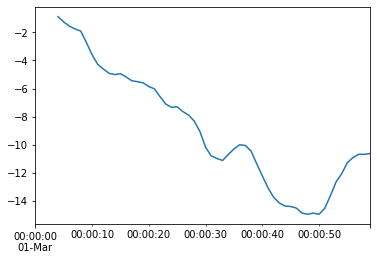

In [15]:
means = first_minute.rolling(window=5, center=False).mean()
means.plot()

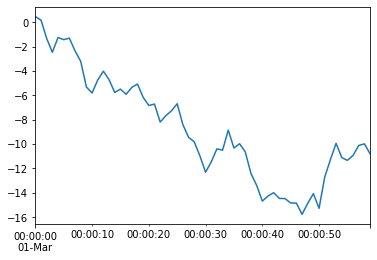

In [16]:
first_minute.plot()

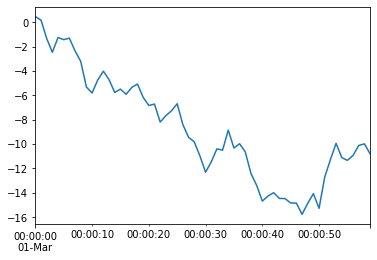

In [17]:
h1w = walk['2020-03-01 00:00']
means2 = h1w.rolling(window=2, center=False).mean()
means5 = h1w.rolling(window=5, center=False).mean()
means10 = h1w.rolling(window=10, center=False).mean()
h1w.plot()

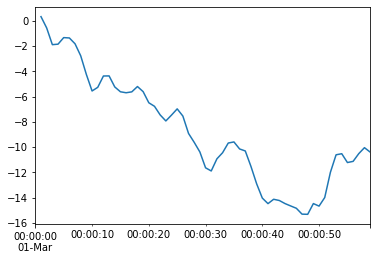

In [18]:
means2.plot()

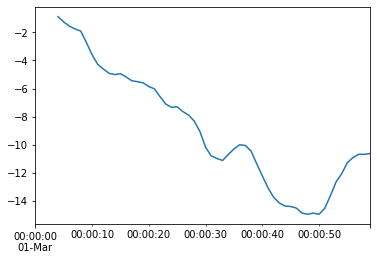

In [19]:
means5.plot()

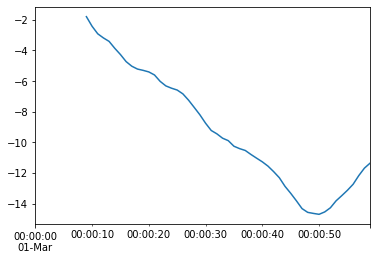

In [20]:
means10.plot()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


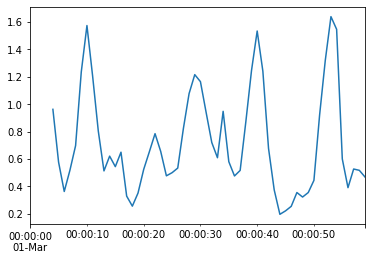

In [22]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean() # np.fabs() 浮點數
means = h1w.rolling(window=5, center=False).apply(mean_abs_dev)
means.plot()

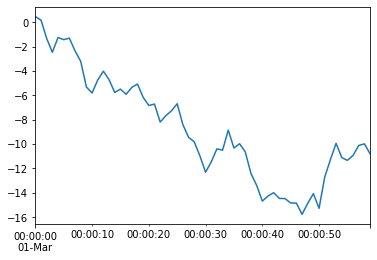

In [23]:
h1w.plot()

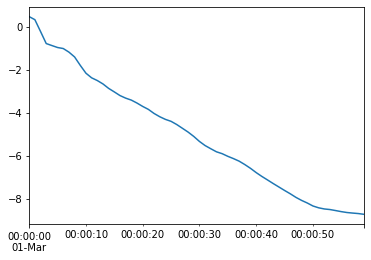

In [24]:
expanding = h1w.expanding(min_periods=1).mean()
expanding.plot()

## For fun 小補充 

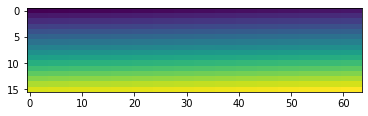

In [25]:
img = np.arange(1024).reshape([16, 64])
plt.imshow(img)

In [26]:
plt.show()

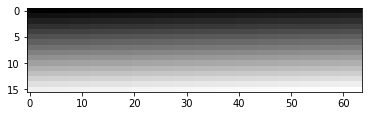

In [27]:
img = np.arange(1024).reshape([16, 64])
plt.imshow(img, cmap='gray') # camp = color map

In [28]:
plt.show()

In [29]:
fname = 'redball.jpg'

In [31]:
img = plt.imread(fname)

In [32]:
print(type(img))

<class 'numpy.ndarray'>


In [33]:
print(img.shape)

(194, 259, 3)


In [34]:
print(img.ndim)

3


In [35]:
print(img[0:5, 0:5, 0]) # R：紅色

[[249 249 230 227 225]
 [228 233 246 252 252]
 [232 230 250 251 253]
 [222 229 252 255 255]
 [255 252 229 221 220]]


In [36]:
print(img[0:5, 0:5, 1]) # G：綠色

[[249 249 230 227 225]
 [228 233 246 252 252]
 [232 230 250 251 253]
 [222 229 252 255 255]
 [255 252 229 221 220]]


In [37]:
print(img[0:5, 0:5, 2]) # B：藍色

[[249 249 230 227 225]
 [228 233 246 252 252]
 [232 230 250 251 253]
 [222 229 252 255 255]
 [255 252 229 221 220]]


In [38]:
fname = 'redball.jpg'
img = plt.imread(fname)
print(img.shape)

(194, 259, 3)


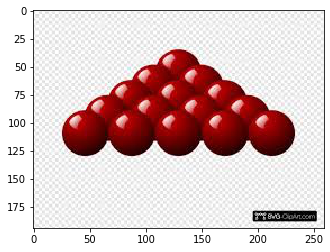

In [39]:
h = img.shape[0] # 高，Y-軸
w = img.shape[1] # 寬，X-軸
plt.imshow(img)

In [40]:
plt.show()

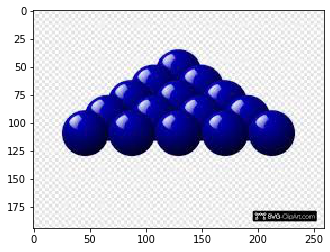

In [41]:
fname = 'redball.jpg'
img = plt.imread(fname)
plt.imshow(img[:, :, [2, 1, 0]])
plt.show()

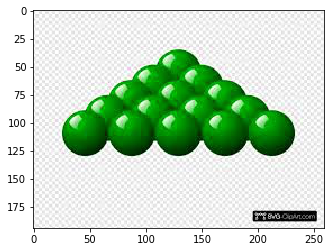

In [42]:
plt.imshow(img[:, :, [1, 0, 2]])
plt.show()